In [ ]:
import sys
!sudo add-apt-repository ppa:saiarcot895/chromium-beta
#실행 결과에서 Enter 입력
!sudo apt remove chromium-browser
!sudo snap remove chromium
!sudo apt install chromium-browser
!pip3 install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')


PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/saiarcot895/chromium-beta/ubuntu/ jammy main'
Description:
This PPA contains the latest Chromium Beta builds, with hardware video decoding enabled (hidden behind a flag), and support for Widevine (needed for viewing many DRM-protected videos) enabled.

== Hardware Video Decoding ==

To enable hardware video decoding, start Chromium with the --enable-features=VaapiVideoDecoder argument. To make this persistent, create a file at /etc/chromium-browser/customizations/92-vaapi-hardware-decoding with the following contents:

CHROMIUM_FLAGS="${CHROMIUM_FLAGS} --enable-features=VaapiVideoDecoder"

See also https://wiki.archlinux.org/title/Chromium#Hardware_video_acceleration for more information on VAAPI video decoding support.

=== Widevine Support ===

The packages in this PPA have support for Widevine inside Chromium enabled. However, you still need to copy some files from

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import csv

# 크롬 옵션 설정
chrome_options = Options()
chrome_options.add_argument('--headless')  # 브라우저를 실제로 띄우지 않고 실행
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# 드라이버 생성
driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 10)  # 최대 10초까지 대기

# CSV 파일 생성
with open("actors_info.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["배우 이름"] + [f"정보 {i}" for i in range(1, 13)])  # 최대 12개 상세정보 저장

    # 페이지 열기
    driver.get("http://www.cine21.com/rank/person")

    for nextButton in range(1, 6):  # 1~5 페이지 이동
        for page in range(1, 11):  # 각 페이지 내 1~10 이동
            for i in range(1, 8):  # 한 페이지에서 1~7번째 배우 선택
                try:
                    # "2년" 링크 클릭

                    two_years_link = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[1]/ul/li[2]/a[4]")))
                    two_years_link.click()
                    time.sleep(2)  # 페이지 변경을 기다림

                    # 페이지 이동 버튼 클릭 (필요한 경우)
                    if nextButton == 2:
                        for j in range(1, nextButton):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                            button.click()
                            time.sleep(2)
                    elif nextButton > 2:
                        button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[2]/span[2]")))
                        button.click()
                        time.sleep(2)
                        for j in range(1, nextButton-1):
                            button = wait.until(EC.element_to_be_clickable((By.XPATH, "/html/body/div[2]/div[2]/div[2]/div[2]/div/a[3]/span[2]")))
                            button.click()
                            time.sleep(2)


                    # 페이지 번호 클릭
                    page_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/div/div/a[{page}]"
                    pageButton = wait.until(EC.element_to_be_clickable((By.XPATH, page_xpath)))
                    pageButton.click()
                    time.sleep(3)  # 페이지 로드 대기

                    # 배우 이름 가져오기
                    actor_xpath = f"/html/body/div[2]/div[2]/div[2]/div[2]/ul/li[{i}]/div/a"
                    actor_element = wait.until(EC.presence_of_element_located((By.XPATH, actor_xpath)))
                    actor_name = actor_element.text
                    actor_element.click()
                    time.sleep(2)

                    # 배우 상세 정보 가져오기 (최대 12개)
                    actor_details = []
                    for j in range(1, 13):  # 최대 12개 정보 수집
                        detail_xpath = f"/html/body/div[2]/div[2]/div[3]/div/div[2]/div[1]/ul/li[{j}]"
                        try:
                            value = wait.until(EC.presence_of_element_located((By.XPATH, detail_xpath)))
                            actor_details.append(value.text)
                        except:
                            break  # 더 이상 정보가 없으면 중단

                    # CSV에 저장 (부족한 칸은 빈 값으로 채움)
                    writer.writerow([actor_name] + actor_details + [""] * (12 - len(actor_details)))
                    print(f"{actor_name} 정보 저장 완료!")

                    # 이전 페이지로 돌아가기
                    driver.back()
                    time.sleep(2)

                except Exception as e:
                    print(f"에러 발생: {e}")

# 드라이버 종료
driver.quit()
print("크롤링 완료! 'actors_info.csv' 파일을 확인하세요.")


최민식(9편) 정보 저장 완료!
황정민(8편) 정보 저장 완료!
이범수(8편) 정보 저장 완료!
김고은(4편) 정보 저장 완료!
김민재(8편) 정보 저장 완료!
이준혁(4편) 정보 저장 완료!
유해진(11편) 정보 저장 완료!
김무열(6편) 정보 저장 완료!
이성민(8편) 정보 저장 완료!
정우성(8편) 정보 저장 완료!
박지환(9편) 정보 저장 완료!
이동휘(10편) 정보 저장 완료!
정해인(4편) 정보 저장 완료!
박해준(3편) 정보 저장 완료!
박정민(10편) 정보 저장 완료!
정만식(13편) 정보 저장 완료!
전석호(5편) 정보 저장 완료!
김성균(5편) 정보 저장 완료!
강하늘(2편) 정보 저장 완료!
김혜수(3편) 정보 저장 완료!
하정우(11편) 정보 저장 완료!
염정아(8편) 정보 저장 완료!
조정석(4편) 정보 저장 완료!
박서준(6편) 정보 저장 완료!
오대환(6편) 정보 저장 완료!
이도현(1편) 정보 저장 완료!
전여빈(4편) 정보 저장 완료!
장윤주(5편) 정보 저장 완료!
오달수(11편) 정보 저장 완료!
유재명(7편) 정보 저장 완료!
이병헌(8편) 정보 저장 완료!
고규필(8편) 정보 저장 완료!
현빈(4편) 정보 저장 완료!
이주명(1편) 정보 저장 완료!
한선화(4편) 정보 저장 완료!
이지훈(2편) 정보 저장 완료!
조인성(4편) 정보 저장 완료!
조우진(8편) 정보 저장 완료!
허준호(8편) 정보 저장 완료!
김종수(19편) 정보 저장 완료!
곽도원(4편) 정보 저장 완료!
주원(1편) 정보 저장 완료!
박보영(1편) 정보 저장 완료!
정소민(1편) 정보 저장 완료!
김윤석(6편) 정보 저장 완료!
김선영(9편) 정보 저장 완료!
김시후(2편) 정보 저장 완료!
박훈(4편) 정보 저장 완료!
이무생(4편) 정보 저장 완료!
이주빈(1편) 정보 저장 완료!
신승호(1편) 정보 저장 완료!
권상우(2편) 정보 저장 완료!
백윤식(2편) 정보 저장 완료!
송혜교(1편) 정보 저장 완료!
정재영(4편) 정보 저장 완료!
강동원(6편

In [9]:
import pandas as pd

def clean_actors_info(input_file, output_file):
    # Google Colab에서 파일 업로드 시 필요
    from google.colab import files

    # CSV 파일 읽기
    df = pd.read_csv(input_file, header=None)

    # 컬럼명 설정
    df.columns = ["배우 이름", "정보 1", "정보 2", "정보 3", "정보 4", "정보 5", "정보 6",
                  "정보 7", "정보 8", "정보 9", "정보 10", "정보 11", "정보 12"]

    # 배우 이름, 생년월일, 성별, 학교만 추출
    filtered_data = []
    for _, row in df.iterrows():
        name = row["배우 이름"].split("(")[0].strip()  # (6편) 같은 부분 제거
        birth_date = ""
        gender = ""
        school = ""

        for col in df.columns[1:]:  # 정보 1~12 탐색
            value = str(row[col])
            if "생년월일" in value:
                birth_date = value.replace("생년월일", "").strip()
            elif "성별" in value:
                gender = value.replace("성별", "").strip()
            elif "학교" in value:
                school = value.replace("학교", "").split()[0].strip()  # 학교명만 추출

        filtered_data.append([name, birth_date, gender, school])

    # 새로운 데이터프레임 생성
    cleaned_df = pd.DataFrame(filtered_data, columns=["배우 이름", "생년월일", "성별", "학교"])

    # CSV로 저장
    cleaned_df.to_csv(output_file, index=False, encoding="utf-8-sig")
    print(f"정리된 파일이 {output_file}에 저장되었습니다.")

    # 파일 다운로드 제공
    files.download(output_file)

# 사용 예시
input_csv = "actors_info_v2.csv"  # 원본 CSV 파일 경로
output_csv = "cleaned_actors_info_v2.csv"  # 정리된 CSV 파일 경로
clean_actors_info(input_csv, output_csv)


정리된 파일이 cleaned_actors_info_v2.csv에 저장되었습니다.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 41.2 MB/s eta 0:00:00


In [6]:
import koreanize_matplotlib

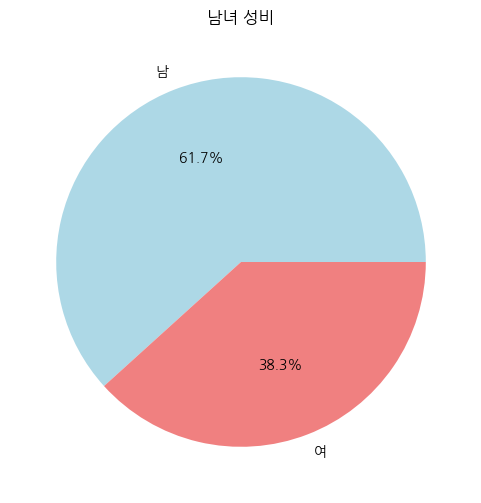

<ipython-input-12-81992c8c91b1>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")


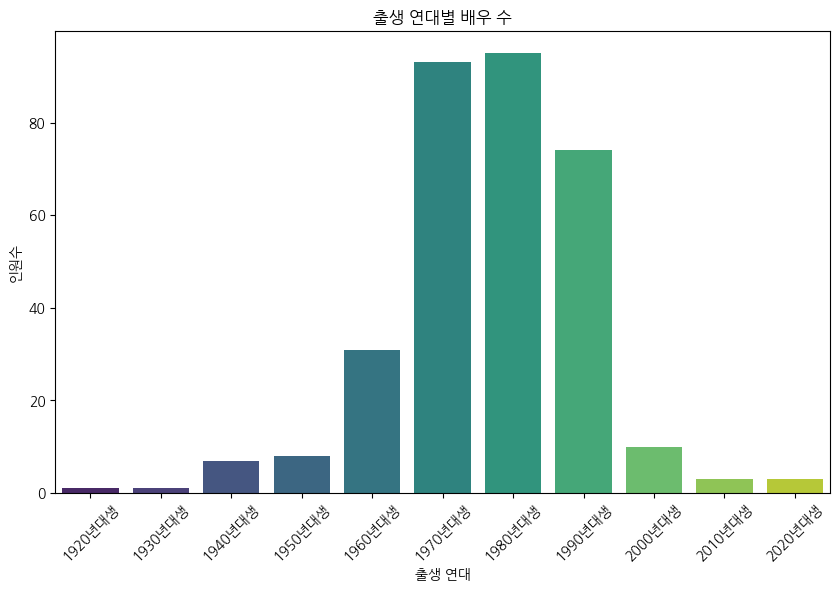

<ipython-input-12-81992c8c91b1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_counts.index, y=school_counts.values, palette="coolwarm")


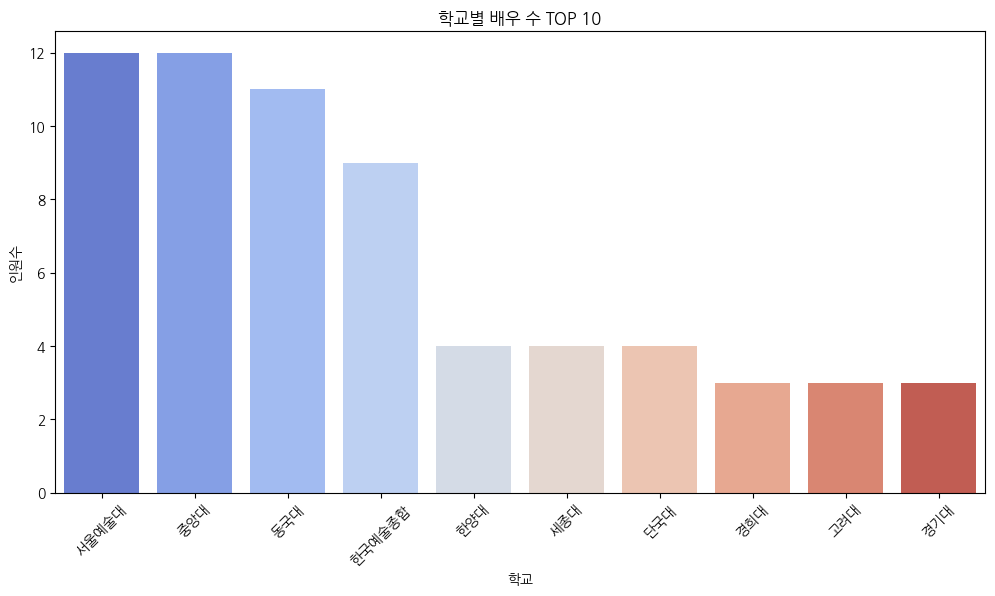

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def analyze_and_visualize(input_file):
    # CSV 파일 읽기
    df = pd.read_csv(input_file)

    # 1. 남녀 성비 파이그래프
    gender_counts = df["성별"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
    plt.title("남녀 성비")
    plt.show()

    # 2. 생년월일 10년 단위로 그룹화하여 막대그래프 생성
    df["출생연도"] = df["생년월일"].str[:4].astype(str)
    df = df[df["출생연도"].str.isnumeric()]  # 숫자가 아닌 값 제거
    df["출생연도"] = df["출생연도"].astype(int)
    df["출생연대"] = (df["출생연도"] // 10 * 10).astype(str) + "년대생"

    decade_counts = df["출생연대"].value_counts().sort_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=decade_counts.index, y=decade_counts.values, palette="viridis")
    plt.title("출생 연대별 배우 수")
    plt.xlabel("출생 연대")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

    # 3. 학교별 배우 수 TOP 10 막대그래프
    school_counts = df["학교"].value_counts().nlargest(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=school_counts.index, y=school_counts.values, palette="coolwarm")
    plt.title("학교별 배우 수 TOP 10")
    plt.xlabel("학교")
    plt.ylabel("인원수")
    plt.xticks(rotation=45)
    plt.show()

# 사용 예시
input_csv = "cleaned_actors_info_v3.csv"  # 정제된 CSV 파일 경로
analyze_and_visualize(input_csv)